In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("combined.csv")

In [3]:
display(df)

,tweet,labels,matched_kws_of_labels
0,ak partiyi desteklediğini söylemesen de biz an...,['siyasi-parti'],"[{'label': 'siyasi-parti', 'keyword': 'adalet ..."
1,adalet ve kalkınma partisi genel merkezindeyiz...,['hükümet'],"[{'label': 'siyasi-parti', 'keyword': 'adalet ..."
2,adalet ve kalkınma partisi adına yakışanı yapm...,['siyasi-parti'],"[{'label': 'siyasi-parti', 'keyword': 'adalet ..."
3,milletinizi khk ileri ile perişan ettiniz suç ...,"['siyasi-parti', 'adalet']","[{'label': 'siyasi-parti', 'keyword': 'adalet ..."
4,ekmeleddin ihsanoğlu yılında chp mhp dsp ldp d...,"['siyasi-parti', 'hükümet']","[{'label': 'siyasi-parti', 'keyword': 'chp'}, ..."
...,...,...,...
4642,etli depremzede bağkurlular bekliyor,['afet'],"[{'label': 'afet', 'keyword': 'depremzede'}]"
4643,bize kpss puanıyla ilave atama olacak sözü ver...,"['eğitim', 'iş-ve-istihdam']","[{'label': 'iş-ve-istihdam', 'keyword': 'kpss ..."
4644,aydan beri adı soyadı adresi telefon numarası ...,"['ekonomi', 'afet']","[{'label': 'ekonomi', 'keyword': 'banka'}, {'l..."
4645,ı dolandırıcı depremzede dövdüren erkin erdoğd...,['afet'],"[{'label': 'afet', 'keyword': 'depremzede'}]"


In [4]:
df['labels'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4647 entries, 0 to 4646
Series name: labels
Non-Null Count  Dtype 
--------------  ----- 
4647 non-null   object
dtypes: object(1)
memory usage: 36.4+ KB


In [5]:
pd.set_option('display.max_rows', None)

Aşağıda görüldüğü üzere tweetler arasında 433 dublicated değer vardır.

In [6]:
dublicated_tweets = df[df.duplicated(['tweet'])]
dubnum_tweets = df.duplicated(['tweet']).sum()
# Aynı tweete sahip olan tüm satırları bulun
duplicated_tweets_all = df[df.duplicated(['tweet'], keep=False)]
print(duplicated_tweets_all['tweet'])
print("dublicated tweets count: ", dubnum_tweets)

29      cumhurbaşkanımız milliyetçi hareket partisi mh...
98      yerel seçimlerde ankara ve istanbul akpye geri...
100     recep beni prompterdan okur muharrem ince takı...
101     bizim sorunumuz chp ile değil biz chpyi olanla...
102     cumhuriyet halk partisini getirdiğin nokta bu ...
108     ve olarak meclis içi gurup ve meclis dışı gerç...
112     millet ittifakından meclise giren siyasi parti...
117     siz bu ülkede milliyetçi değilsiniz artık bunu...
124     sayın cumhurbaşkanım vatandaş huzursuz geçen d...
126     hiçbiri bankalar kredi vermiyor bayrama boş du...
127     bülent kuşoğlu doğru yol demokrat parti üyesi ...
157     chp anlaşılan örgüt adı altında çeteleşmiş gen...
158     biri ibb seçimi olmak üzere defa seçim kaybetm...
160     kk chpyi iyice karıştırıp bölmeden istanbul ak...
161     hevalla nasıl korkuyolarrr anam anam seçim dah...
164     hayırdır chp babanızın malı mı ya seve ya seve...
167     hata chp lilerde ki sizin her hatanızı göre gö...
168     tanju 

In [7]:
df['labels'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4647 entries, 0 to 4646
Series name: labels
Non-Null Count  Dtype 
--------------  ----- 
4647 non-null   object
dtypes: object(1)
memory usage: 36.4+ KB


In [8]:
def clean_labels(label_str):
    # Stringi temizleyelim
    clean_str = label_str.replace('[','').replace(']','').replace('\'', '').replace(' ', '')
    # Stringi virgüle göre bölelim ve listeye dönüştürelim
    clean_list = clean_str.split(",")
    return clean_list

df['labels'] = df['labels'].astype(str)
df['label'] = df['labels'].apply(clean_labels)

In [9]:
data = df['label']

In [10]:
data

0                                          [siyasi-parti]
1                                               [hükümet]
2                                          [siyasi-parti]
3                                  [siyasi-parti, adalet]
4                                 [siyasi-parti, hükümet]
5                                               [ekonomi]
6                                               [hükümet]
7                                          [siyasi-parti]
8         [siyasi-parti, iş-ve-istihdam, hükümet, sağlık]
9                                 [siyasi-parti, hükümet]
10                                [siyasi-parti, hükümet]
11                        [siyasi-parti, adalet, hükümet]
12                                       [hükümet, seçim]
13                                [siyasi-parti, hükümet]
14                                              [ekonomi]
15                      [siyasi-parti, hükümet, ideoloji]
16              [siyasi-parti, hükümet, politik-strateji]
17            

In [11]:
pd.reset_option('display.max_rows')

In [12]:
# Etiket sayısını içeren yeni bir kolon oluşturuyoruz
df['num_labels'] = data.apply(len)

# Birden fazla etiket içeren tweetlerin yüzdesini buluyoruz
multi_label_percentage = (df[df['num_labels'] > 1].shape[0] / df.shape[0]) * 100

print(f"Tweetlerin %{multi_label_percentage} kadarı birden fazla etiket içeriyor.")

Tweetlerin %39.25112976113622 kadarı birden fazla etiket içeriyor.


In [13]:
# tüm listeyi 1D arreye çevirdik.
flat_data = [item for sublist in data for item in sublist]

In [14]:
benzersiz_sayi = pd.Series(flat_data).nunique()

print("Benzersiz değerlerin sayısı:", benzersiz_sayi)

Benzersiz değerlerin sayısı: 32


In [15]:
benzersiz_degerler = pd.Series(flat_data).unique()
for deger in benzersiz_degerler:
    print(deger)

siyasi-parti
hükümet
adalet
ekonomi
iş-ve-istihdam
sağlık
seçim
ideoloji
politik-strateji
din
dış-politika
çevre-ve-şehircilik
siyasi-figür
güvenlik
mülteciler

terör
sivil-haklar
sosyal
sosyal-yardım
eğitim
eşitlik
kültür-ve-sanat
siyasi-manipülasyon
konut
mesleki-haklar
?
afet
ulaşım
aile-ve-toplumsal-konular
yolsuzluk
dernek


burada datasetinde boşluklar ve ? olduğunu görüyoruz ve hangi etiketin ne kadar kullanıldğını görüyoruz.

<Figure size 432x288 with 0 Axes>

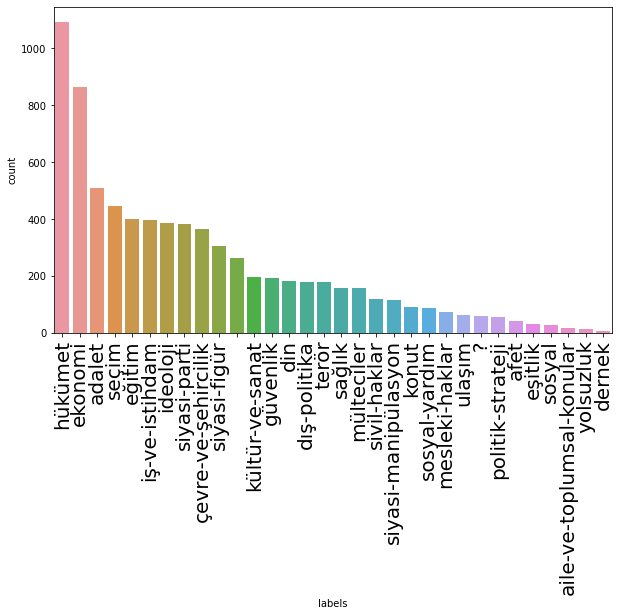

In [16]:
plt.rcParams['xtick.labelsize'] = 20  # X eksenindeki etiketlerin font boyutunu ayarlar
plt.subplots_adjust(wspace=0.5, hspace=2)

# Veriyi DataFrame'e dönüştür
df3 = pd.DataFrame(flat_data, columns=["labels"])

# Etiketlerin sıklığını gösteren bir countplot çiz
plt.figure(figsize=(10, 6))
sns.countplot(x="labels", data=df3, order=df3["labels"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [17]:
from sklearn.preprocessing import MultiLabelBinarizer

In [18]:
# MultiLabelBinarizer ile etiketlerimizi one-hot kodlamaya dönüştürüyoruz.
mlb = MultiLabelBinarizer()
df4 = df.join(pd.DataFrame(mlb.fit_transform(df.pop('label')),
                          columns=mlb.classes_,
                          index=df.index))


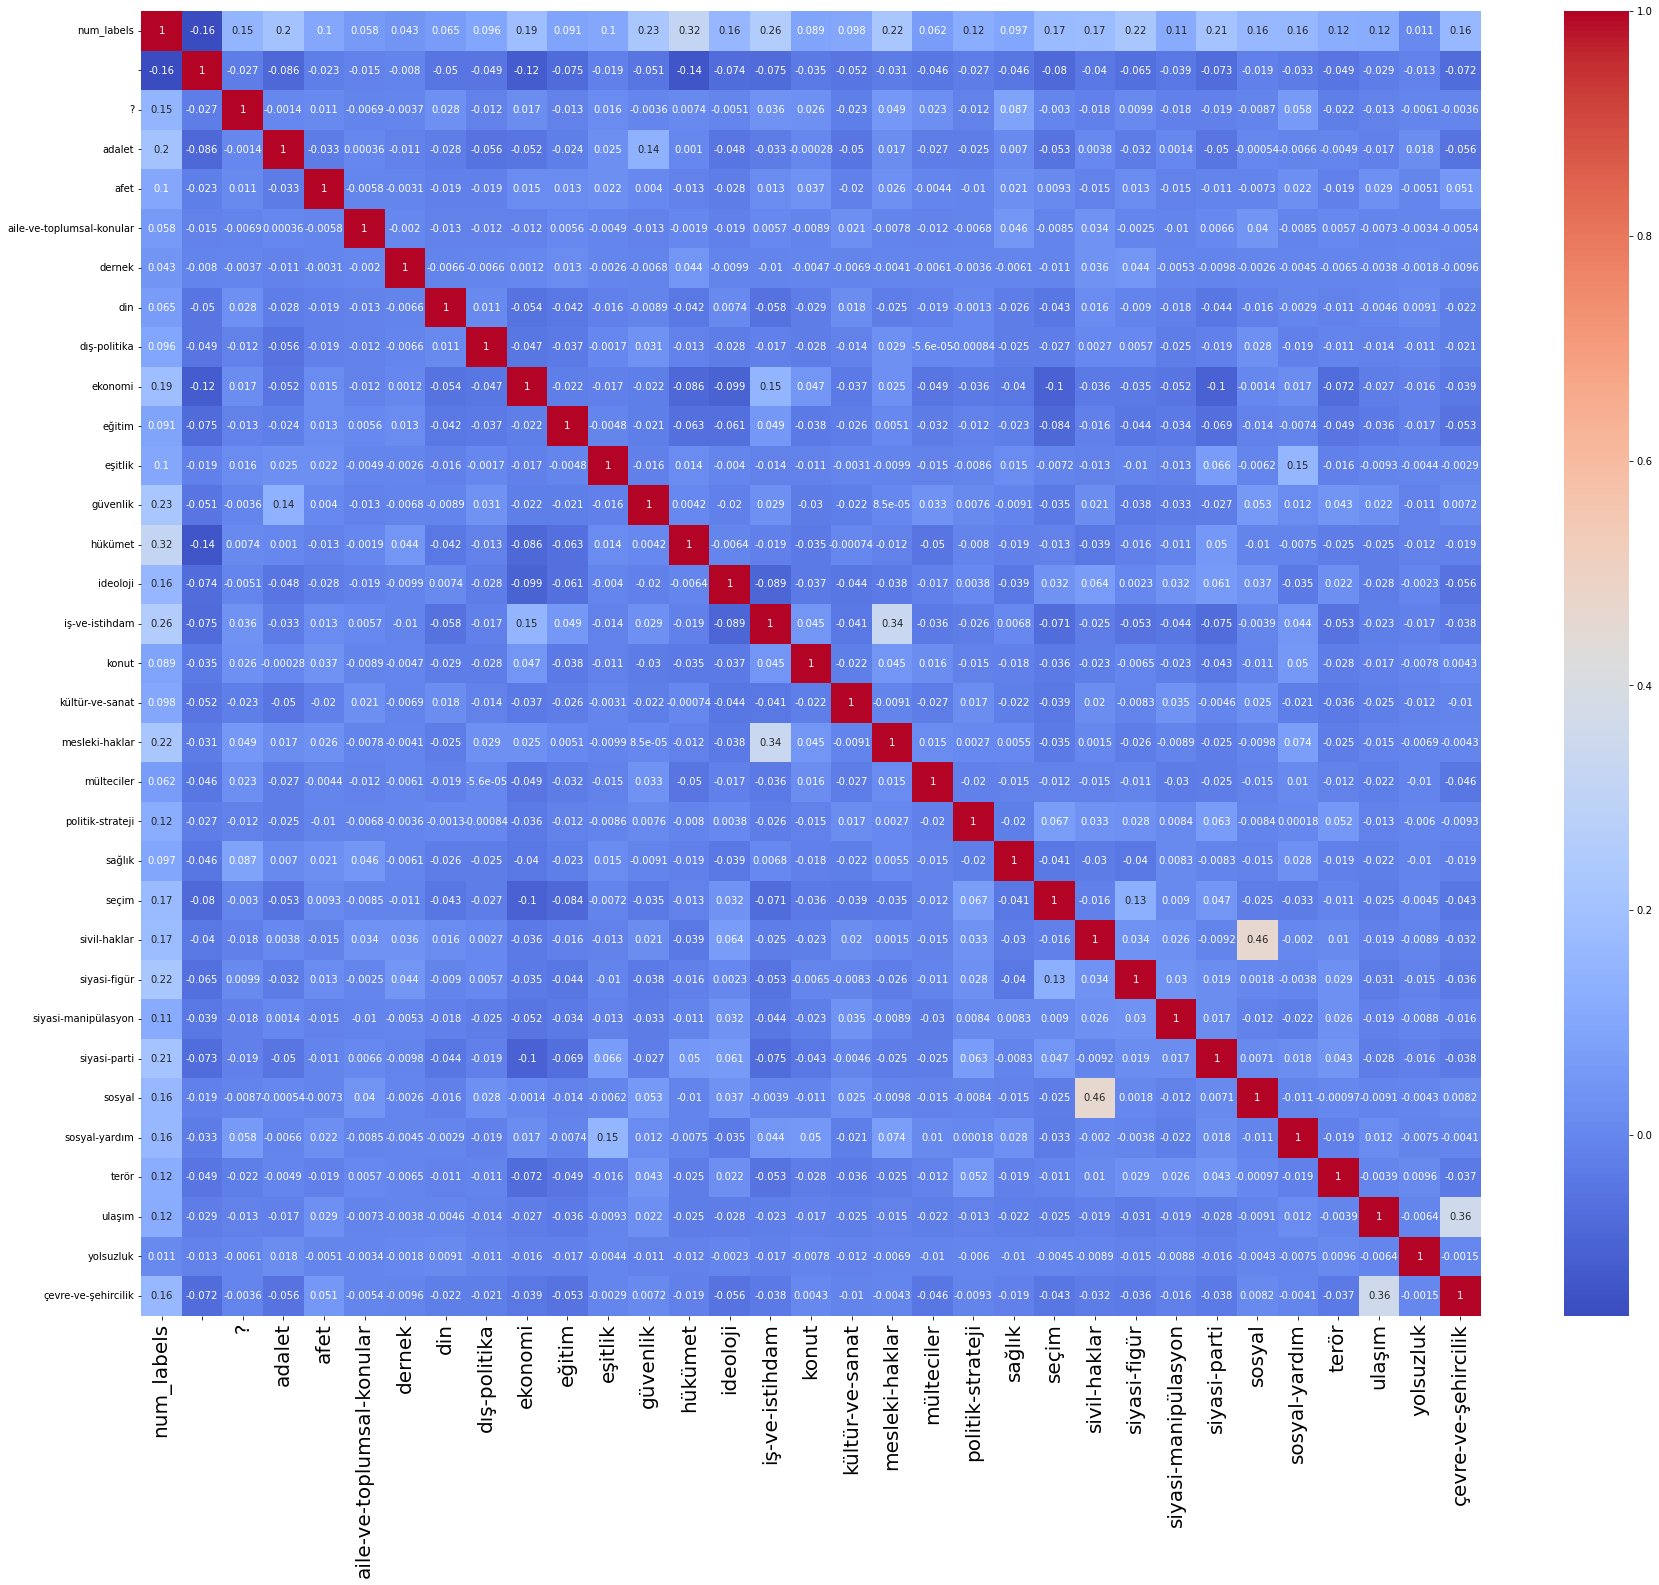

In [19]:
# Korelasyon matrisini hesapla
correlation_matrix = df4.corr()
plt.figure(figsize=(30,24)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Burada korelasyon matrixini görüyorsun buradan hangi etiketlere hangi etiketler alakalı görebilirsiniz.

In [20]:

upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))
flattened = upper_triangle.stack()
sorted_correlations = flattened.sort_values(ascending=False)
# En Alakalı 5 Çifti yazdır
print("En Alakalı 5 Çift:")
for pairs, corr in sorted_correlations.head(5).items():
    print(f"  {pairs[0]} ve {pairs[1]} arasındaki korelasyon: {corr} \n")

# En Alakasız 5 Çifti yazdır
print("\nEn Alakasız 5 Çift:")
for pairs, corr in sorted_correlations.tail(5).items():
    print(f"  {pairs[0]} ve {pairs[1]} arasındaki korelasyon: {corr} \n")

En Alakalı 5 Çift:
  sivil-haklar ve sosyal arasındaki korelasyon: 0.4606794159620471 

  ulaşım ve çevre-ve-şehircilik arasındaki korelasyon: 0.35949121093703335 

  iş-ve-istihdam ve mesleki-haklar arasındaki korelasyon: 0.3356589822780854 

  num_labels ve hükümet arasındaki korelasyon: 0.31743573997733543 

  num_labels ve iş-ve-istihdam arasındaki korelasyon: 0.25631107270905357 


En Alakasız 5 Çift:
  ekonomi ve siyasi-parti arasındaki korelasyon: -0.10251013546420615 

  ekonomi ve seçim arasındaki korelasyon: -0.10425882407508066 

   ve ekonomi arasındaki korelasyon: -0.11688621417345856 

   ve hükümet arasındaki korelasyon: -0.1357482120453752 

  num_labels ve  arasındaki korelasyon: -0.1608099286000817 



Bide  Boş veya '?' etiketlerini çıkarılmış versiyonuna bakalım

In [21]:
# Boş veya '?' etiketlerini çıkarılmış versiyonu
df3 = df4.drop(columns=['', '?'])
correlation_matrix2 = df3.corr()
upper_triangle2 = correlation_matrix2.where(np.triu(np.ones(correlation_matrix2.shape), k=1).astype(np.bool_))
flattened2 = upper_triangle2.stack()
sorted_correlations2 = flattened2.sort_values(ascending=False)
print("En Alakalı 5 Çift:")
for pairs, corr in sorted_correlations2.head(5).items():
    print(f"  {pairs[0]} ve {pairs[1]} arasındaki korelasyon: {corr} \n")
print("\nEn Alakasız 5 Çift:")
for pairs, corr in sorted_correlations2.tail(5).items():
    print(f"  {pairs[0]} ve {pairs[1]} arasındaki korelasyon: {corr} \n")

En Alakalı 5 Çift:
  sivil-haklar ve sosyal arasındaki korelasyon: 0.4606794159620471 

  ulaşım ve çevre-ve-şehircilik arasındaki korelasyon: 0.35949121093703335 

  iş-ve-istihdam ve mesleki-haklar arasındaki korelasyon: 0.3356589822780854 

  num_labels ve hükümet arasındaki korelasyon: 0.31743573997733543 

  num_labels ve iş-ve-istihdam arasındaki korelasyon: 0.25631107270905357 


En Alakasız 5 Çift:
  ekonomi ve hükümet arasındaki korelasyon: -0.08560613085639683 

  ideoloji ve iş-ve-istihdam arasındaki korelasyon: -0.08906673593278622 

  ekonomi ve ideoloji arasındaki korelasyon: -0.09924675390672982 

  ekonomi ve siyasi-parti arasındaki korelasyon: -0.10251013546420615 

  ekonomi ve seçim arasındaki korelasyon: -0.10425882407508066 



In [22]:
df

,tweet,labels,matched_kws_of_labels,num_labels
0,ak partiyi desteklediğini söylemesen de biz an...,['siyasi-parti'],"[{'label': 'siyasi-parti', 'keyword': 'adalet ...",1
1,adalet ve kalkınma partisi genel merkezindeyiz...,['hükümet'],"[{'label': 'siyasi-parti', 'keyword': 'adalet ...",1
2,adalet ve kalkınma partisi adına yakışanı yapm...,['siyasi-parti'],"[{'label': 'siyasi-parti', 'keyword': 'adalet ...",1
3,milletinizi khk ileri ile perişan ettiniz suç ...,"['siyasi-parti', 'adalet']","[{'label': 'siyasi-parti', 'keyword': 'adalet ...",2
4,ekmeleddin ihsanoğlu yılında chp mhp dsp ldp d...,"['siyasi-parti', 'hükümet']","[{'label': 'siyasi-parti', 'keyword': 'chp'}, ...",2
...,...,...,...,...
4642,etli depremzede bağkurlular bekliyor,['afet'],"[{'label': 'afet', 'keyword': 'depremzede'}]",1
4643,bize kpss puanıyla ilave atama olacak sözü ver...,"['eğitim', 'iş-ve-istihdam']","[{'label': 'iş-ve-istihdam', 'keyword': 'kpss ...",2
4644,aydan beri adı soyadı adresi telefon numarası ...,"['ekonomi', 'afet']","[{'label': 'ekonomi', 'keyword': 'banka'}, {'l...",2
4645,ı dolandırıcı depremzede dövdüren erkin erdoğd...,['afet'],"[{'label': 'afet', 'keyword': 'depremzede'}]",1
